In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=67a68e5b84025e7277f7cdfe674c56404b7b95262b5b728cfb8190407ad6d8b9
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import glob
import numpy as np
import cv2
import pandas as pd
from imutils import paths
import face_recognition
import pickle
import os
import matplotlib.pyplot as plt

In [5]:
img_files=glob.glob('/content/drive/MyDrive/images/*.jpg')
df=pd.read_csv('/content/drive/MyDrive/images/dataset.csv')


In [6]:
str='/content/drive/MyDrive/images/'
for i in range(0, 22):
  df['image'][i]=str+df['image'][i]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,image,value
0,/content/drive/MyDrive/images/false1.jpg,0
1,/content/drive/MyDrive/images/false2.jpg,0
2,/content/drive/MyDrive/images/false3.jpg,0
3,/content/drive/MyDrive/images/false4.jpg,0
4,/content/drive/MyDrive/images/false5.jpg,0
5,/content/drive/MyDrive/images/false6.jpg,0
6,/content/drive/MyDrive/images/false7.jpg,0
7,/content/drive/MyDrive/images/false8.jpg,0
8,/content/drive/MyDrive/images/false9.jpg,0
9,/content/drive/MyDrive/images/true1.jpg,1


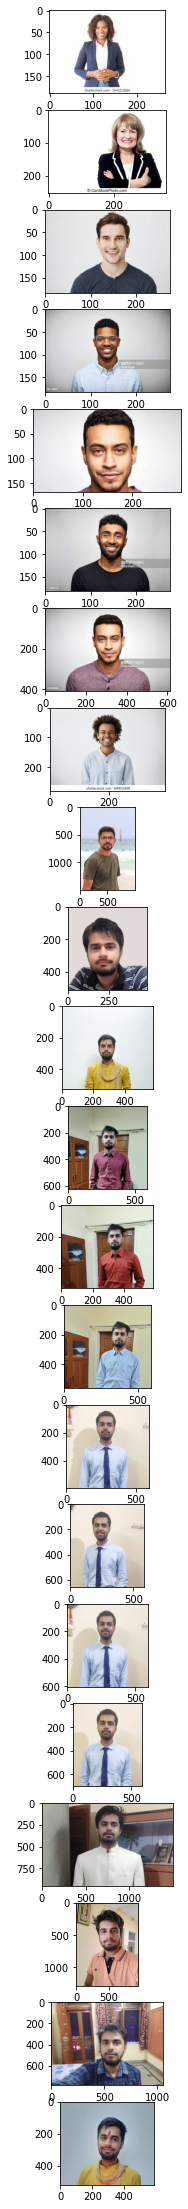

In [7]:
cou=1
fig=plt.figure(figsize=(50, 40))
for i in df['image']:
  fig.add_subplot(22, 1, cou)
  img=cv2.imread(i)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  cou+=1

In [8]:
encodings=[]
name=[]
for i in df['image']:
    img=cv2.imread(i)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boundary = face_recognition.face_locations(img, model='hog')
    vector = face_recognition.face_encodings(img, boundary)
    for j in vector:
        encodings.append(j)
        if i[-10:-5]!='false':
          name.append('Ritik')
        else:
          name.append('Unknown')
data={"encodings": encodings, "names": name}
name

['Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik',
 'Ritik']

In [9]:
#MATCH FUNCTION
def match(img):
  boundary=face_recognition.face_locations(img, model='hog')
  vector=face_recognition.face_encodings(img, boundary)
  encodings = face_recognition.face_encodings(img)
  for i in encodings:
      matches = face_recognition.compare_faces(data["encodings"], i)
      name = 'Unknown'
      if True in matches:
          matchedIdxs = [i for (i, b) in enumerate(matches) if b]
          counts = {}
          for i in matchedIdxs:
              name = data["names"][i]
              counts[name] = counts.get(name, 0) + 1
              name = max(counts, key=counts.get)
  return name,matches

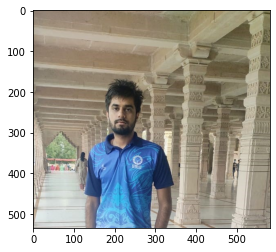

In [10]:
#TEST IMAGES
test_img1=cv2.imread('/content/drive/MyDrive/images/test1.jpg')
test_img1=cv2.cvtColor(test_img1, cv2.COLOR_BGR2RGB)
plt.imshow(test_img1)

In [30]:
name,matches = match(test_img1)
print(name)
matches

Ritik


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [31]:
from sklearn.metrics import confusion_matrix
y_true =[False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True]

cf=confusion_matrix(y_true, matches)

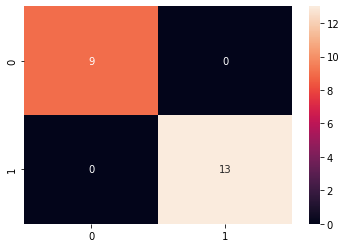

In [32]:
import seaborn as sns
sns.heatmap(cf, annot=True)

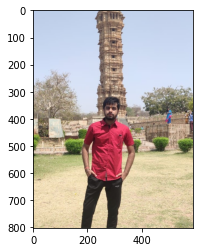

In [14]:
test_img2=cv2.imread('/content/drive/MyDrive/images/test2.jpg')
test_img2=cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
plt.imshow(test_img2)

In [15]:
name,matches = match(test_img2)
print(name)
matches

Ritik


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

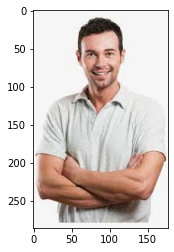

In [16]:
test_img3=cv2.imread('/content/drive/MyDrive/images/test3.jpg')
test_img3=cv2.cvtColor(test_img3, cv2.COLOR_BGR2RGB)
plt.imshow(test_img3)

In [17]:
name,matches = match(test_img3)
print(name)
matches

Unknown


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

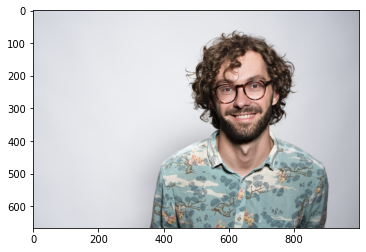

In [18]:
test_img4=cv2.imread('/content/drive/MyDrive/images/test4.jpg')
test_img4=cv2.cvtColor(test_img4, cv2.COLOR_BGR2RGB)
plt.imshow(test_img4)

In [33]:
name,matches = match(test_img4)
print(name)
matches

Unknown


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [34]:
from sklearn.metrics import confusion_matrix
y_true =[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]

cf=confusion_matrix(y_true, matches)

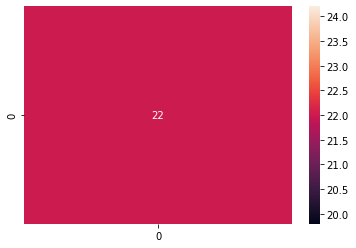

In [35]:
import seaborn as sns
sns.heatmap(cf, annot=True)